In [2]:
##############################################################################
#
# This code is part of the publication:
# https://www.biorxiv.org/content/10.1101/2020.11.30.403840v1
#
# The generation of cortical novelty responses through inhibitory plasticity
# Auguste Schulz*, Christoph Miehl*, Michael J. Berry II, Julijana Gjorgjieva
#
# * equal contribution
#
##############################################################################

# Figure 6

Author: Auguste Schulz  
1. Schematic
2. Population response disinhibition
3. Denseness presentation
4. Dininhibition strength

In [3]:
from IPython.display import HTML, IFrame, Image

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import os, fnmatch
import time
import h5py
from scipy.signal import find_peaks, peak_prominences
from scipy import stats
from scipy import optimize
from scipy.signal import decimate
from scipy import signal
import gc
import time

%matplotlib inline


from matplotlib import rcParams, cm
rcParams['grid.linewidth'] = 0
rcParams['pdf.fonttype'] = 42
# import custom functions
from helper_functions import *
import helper_functions

#reload(helper_functions)
from helper_functions import *

from evaluation_functions import *
import evaluation_functions

#reload(evaluation_functions)
from evaluation_functions import *
from helper.utils import return_colors,beautify_plot

In [4]:
def cm2inch(*tupl):
    inch = 2.54
    if isinstance(tupl[0], tuple):
        return tuple(i/inch for i in tupl[0])
    else:
        return tuple(i/inch for i in tupl)
def count(list1, l, r): 
    c = 0
    # traverse in the list1 
    for x in list1: 
        # condition check 
        if x>= l and x<= r: 
            c+= 1
    return c 

def get_time_idx(time, onsets):
    idx = []
    for tt in onsets:
        #print(tt)
        #print(min(min(np.where(tt<=time))))
        idx.append(min(min(np.where(time>=tt))))
        
    return idx

figsize_cm = (20,10)
figsize_inch = cm2inch(figsize_cm)
figsize_inch

(7.874015748031496, 3.937007874015748)

### All files are read in via .txt file (8 disinhib stregnth 5 instantiations each)

In [7]:
E_all  = []
E_all_nov  = []

I_all = []
ed_all = []
FIG_DIR_ALL = []
Xweight_all = []
Xweightinhib_all = []

ItoAweight_all = []
timevector_all = []
avgweightEmem_all = []
avgweightImem_all = []
avgweightEnov_all = []
avgweightImem_all = []
avgwindow = 4
timestr = time.strftime("%Y-%m-%d-%H-%M-%S")


RUN_DIR = "../data/"
RESULTS_DIR = "../results/"

# read in all files
with open(RUN_DIR+'new_runs.txt', 'r') as f:
    file_names = [line.strip() for line in f]
file_names.sort()
    
FILE_NAME_RUN = [RUN_DIR + file_name for file_name in file_names]
#file_name_run = run_folder + file_name
# open file
frun = h5py.File(FILE_NAME_RUN[0], "r")

FILE_NAME_RUN[-1]
dict_dursimspikes_last  = frun["dursimspikes"]
dict_dursimspikes_keys = dict_dursimspikes_last.keys()
dict_dursimspikes_keys;
adjustfact  = frun["params"]['adjustfactorinhib2'].value
stimulus  = frun["initial"]['stimulus'].value
ptretrain  = frun["initial"]['lengthpretrain'].value

print(stimulus[:,-1])
print(stimulus[2,ptretrain])
dict_dursimspikes_last= frun["dursimspikes"].keys()
dict_dursimspikes_last;
print(frun["initial"].keys())

[1.00e+00 2.68e+04 2.71e+04 1.20e+01]
4300.0
<KeysViewHDF5 ['assemblymembers', 'idxblockonset', 'inhibassemblies', 'lengthpretrain', 'seqnumber', 'stimparams', 'stimparams_prestim', 'stimulus']>


/home/auguste/Software/anaconda3/lib/python3.7/site-packages/h5py/_hl/dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  "Use dataset[()] instead.", H5pyDeprecationWarning)


In [8]:
for i,fn in enumerate(file_names):
    print(fn)
    
    E,I, ed, E_hist, E_hist_boxcar, FIG_DIR, E_nov = analyse_filename(fn, avgwindow=avgwindow, timestr=timestr, RUN_DIR = RUN_DIR, RESULTS_DIR=RESULTS_DIR)
    #print(fn)
    E_all.append(E)
    I_all.append(I)
    ed_all.append(ed)
    E_all_nov.append(E_nov)
    FIG_DIR_ALL.append(FIG_DIR)
    if i==3:
        Xweight, ItoAweight, timevector_weights, avgweightEmem, avgweightImem, avgweightEnov, avgweightImem, It1, It2, InhibXweight, seqnumber, stimulus, colormain, idxblockonset= analyse_weights(fn, True, figsize=(10,5), RUN_DIR = RUN_DIR, RESULTS_DIR=RESULTS_DIR)
#     #run_single_neuron_eval_SSA(fn, binwidth = 50, avgwindow = avgwindow, timestr = timestr)
    #gc.collect()
spiketimes = 0
gc.collect()

SSA_200_disinhib_true_SUB_0.0_inhibtunning_0.1_ifAAnotAB_false__dur28000.0msNblocks1Ntrain0lenstim300lenpause900Nreps20strength12wadaptfalseiSTDPtrueRateAdjust1Time2020-05-11-23-57-03repeatedsequences.h5
NON ADAPTIVE
SSA_200_disinhib_true_SUB_0.0_inhibtunning_0.1_ifAAnotAB_false__dur28000.0msNblocks1Ntrain0lenstim300lenpause900Nreps20strength12wadaptfalseiSTDPtrueRateAdjust1Time2020-05-16-10-56-11repeatedsequences.h5
NON ADAPTIVE
SSA_200_disinhib_true_SUB_0.0_inhibtunning_0.1_ifAAnotAB_false__dur28000.0msNblocks1Ntrain0lenstim300lenpause900Nreps20strength12wadaptfalseiSTDPtrueRateAdjust1Time2020-05-16-10-56-19repeatedsequences.h5
NON ADAPTIVE
SSA_200_disinhib_true_SUB_0.0_inhibtunning_0.1_ifAAnotAB_false__dur28000.0msNblocks1Ntrain0lenstim300lenpause900Nreps20strength12wadaptfalseiSTDPtrueRateAdjust1Time2020-05-16-10-56-22repeatedsequences.h5
NON ADAPTIVE
SSA_200_disinhib_true_SUB_0.0_inhibtunning_0.1_ifAAnotAB_false__dur28000.0msNblocks1Ntrain0lenstim300lenpause900Nreps20strength12wad

/home/auguste/Software/anaconda3/lib/python3.7/site-packages/h5py/_hl/dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  "Use dataset[()] instead.", H5pyDeprecationWarning)


SSA_200_disinhib_true_SUB_0.75_inhibtunning_0.1_ifAAnotAB_false__dur28000.0msNblocks1Ntrain0lenstim300lenpause900Nreps20strength12wadaptfalseiSTDPtrueRateAdjust1Time2020-05-16-12-52-48repeatedsequences.h5
NON ADAPTIVE
SSA_200_disinhib_true_SUB_1.0_inhibtunning_0.1_ifAAnotAB_false__dur28000.0msNblocks1Ntrain0lenstim300lenpause900Nreps20strength12wadaptfalseiSTDPtrueRateAdjust1Time2020-05-11-23-55-53repeatedsequences.h5
NON ADAPTIVE
SSA_200_disinhib_true_SUB_1.0_inhibtunning_0.1_ifAAnotAB_false__dur28000.0msNblocks1Ntrain0lenstim300lenpause900Nreps20strength12wadaptfalseiSTDPtrueRateAdjust1Time2020-05-16-12-15-31repeatedsequences.h5
NON ADAPTIVE
SSA_200_disinhib_true_SUB_1.0_inhibtunning_0.1_ifAAnotAB_false__dur28000.0msNblocks1Ntrain0lenstim300lenpause900Nreps20strength12wadaptfalseiSTDPtrueRateAdjust1Time2020-05-16-12-15-37repeatedsequences.h5
NON ADAPTIVE
SSA_200_disinhib_true_SUB_1.0_inhibtunning_0.1_ifAAnotAB_false__dur28000.0msNblocks1Ntrain0lenstim300lenpause900Nreps20strength12wa

1421

In [9]:
range_pre_stim_all = []
range_stim_all = []
range_pre_disin_all = []
range_disin_all = []

for i,fn in enumerate(file_names):
    print(fn)
    file_name = fn
    Nseq = 1

    binwidth = 50
    avgwindow = 5
    timestr = "_now"
    RUN_DIR="../data/"
    RESULTS_DIR ="../results/"
    # folder with stored data from the run
    run_folder = RUN_DIR
    results_folder = RESULTS_DIR

    file_name_results = results_folder + file_name + "/results.h5"
    #f_results = h5py.File(file_name_results, "w")

    # define folder where figues should be stored
    figure_directory = results_folder + file_name + "/" + "rasters/"#% (avgwindow*binwidth)
    if not os.path.exists(figure_directory):
        os.makedirs(figure_directory)

    # read in run parameters
    file_name_run = run_folder + file_name
    # open file
    frun = h5py.File(file_name_run, "r")

    # read in stimulus parameters
    Nimg, Nreps, Nseq, Nblocks, stimstart, lenstim, lenpause, strength  = frun["initial"]["stimparams"].value
    Ni = frun["params"]["Ni"].value
    Ne = frun["params"]["Ne"].value
    Ncells = Ni + Ne
    seqnumber  = frun["initial"]["seqnumber"].value
    assemblymembers = frun["initial"]["assemblymembers"].value.transpose()
    color = ["midnightblue","lightskyblue","royalblue","lightsteelblue","darkred","darksalmon", "saddlebrown","lightcoral","darkgreen","greenyellow","darkolivegreen","chartreuse","darkmagenta","thistle","indigo","mediumslateblue","darkorange","tan","sienna","orange", "midnightblue","lightskyblue","royalblue","lightsteelblue","darkred","darksalmon", "saddlebrown","lightcoral","darkgreen","greenyellow","darkolivegreen","chartreuse","darkmagenta","thistle","indigo","mediumslateblue","darkorange","tan","sienna","orange"]
    Nblocks = min([Nblocks, 10])

    # get indices of all assembly members and novelty members as well as untargeted neuron indices
    Nass = Nimg*Nseq
    members = assemblymembers[0:Nass,:]
    novelty = assemblymembers[Nass:,:]

    membersidx = np.unique(members[members>0])
    noveltyidx = np.unique(novelty[novelty>0])

    untargetedidx = np.ones(Ncells, dtype=bool)
    untargetedidx[membersidx-1] = False
    untargetedidx[noveltyidx-1] = False
    untargetedidx[Ne:] = False
    inhibitoryidx = np.arange(Ne,Ncells)

    # read in population averages
    listOfFiles = os.listdir(results_folder + file_name)
    pattern = "spiketime*.h5"
    sub_folder = []

    for entry in listOfFiles:
        if fnmatch.fnmatch(entry, pattern):
                sub_folder.append(entry)

    # get name of subfolder spiketime + date.h5
    file_name_spikes = results_folder + file_name + "/" + sub_folder[0]
    f = h5py.File(file_name_spikes, "r")
    # bin width
    lenblocktt  = f["params"]["lenblocktt"].value
    blockbegintt  = f["params"]["blockbegintt"].value
    dt = 0.1
    nbins = int(np.round(lenblocktt*dt/binwidth+1))
    bins = np.linspace(0,lenblocktt, nbins)
    bin_counts = np.zeros((Ncells,nbins-1))
    conv = np.zeros((Ncells,nbins-1), dtype=float)

    timevector = np.linspace((binwidth/2)/1000.,lenblocktt*dt/1000. - (binwidth/2)/1000.,nbins-1)



    all_bincounts = np.zeros((Nseq,Nblocks,Ncells, nbins-1))
    total_spike_counts = np.zeros((Nseq,Nblocks,Ncells))

    all_bincounts_conv = np.zeros((Nseq,Nblocks,Ncells, nbins-1))
    all_zscore_firing = np.zeros((Nseq,Nblocks,Ncells, nbins-1))

    noveltyonset = (Nimg*(Nreps-1)*(lenstim+lenpause)-(lenstim+lenpause))/1000. #convert to seconds
    idxstart = int((noveltyonset - 2)*10)
    idxend = int((noveltyonset + 3)*10)
    winlength = avgwindow*binwidth

    idxconv = np.floor_divide(avgwindow,2)+1 # account for convolution in mode same ignore first len(kernel)/2 samples
    spiketimes1 = f["spiketimeblocks"]["seq"+ str(1) + "block"+ str(1)].value.transpose()
    idxnovelty = frun["novelty"]["indices"+ str(1)].value.transpose()

    Nseq=1
    Nblocks=1
    for seq in range(1,Nseq + 1):
        for bl in range(1,Nblocks + 1):
            # read in spiketimes
            spiketimes = f["spiketimeblocks"]["seq"+ str(seq) + "block"+ str(bl)].value.transpose()

            # rebin spiketimes in binsize of 100 ms
            for cc in range(0,Ncells):
                all_bincounts[seq-1,bl-1,cc,:], bin_edges = np.histogram(spiketimes[cc,spiketimes[cc,:]>0], bins=bins)#lenblocktt/1000)
                total_spike_counts[seq-1,bl-1,cc] = sum(all_bincounts[seq-1,bl-1,cc,:])
            #spiketimes = 0
            gc.collect()
            # get firing rates by dividing by the length of the binwidth in seconds
            bin_edges = bin_edges*dt/1000 # seconds
            all_bincounts[seq-1,bl-1,:,:] = all_bincounts[seq-1,bl-1,:,:]*(1000/binwidth) # divide by binwidth in seconds to get rate
            # apply moving average across 8 bins
            for cc in range(0,Ncells):
                all_bincounts_conv[seq-1,bl-1,cc,1:] = np.convolve(all_bincounts[seq-1,bl-1,cc,1:], np.ones((avgwindow,))/avgwindow, mode='same')# pay attnetion to first and last 800 ms altered due to zero padding
    time_arr = bin_edges[1:]-(bin_edges[1]-bin_edges[0])/2
    nonmembers = np.arange(0,Ne)
    membersarr = assemblymembers[:Nseq*Nimg,:]
    members = np.sort(np.unique(membersarr[membersarr > 0]))
    idxnovelty = np.sort(np.unique(idxnovelty[idxnovelty > 0]))
    #membersarr = nothing
    nonmembers = np.setdiff1d(nonmembers,members)
    nonovnonmems = np.setdiff1d(nonmembers,idxnovelty)
    inhibitorymems = inhibitoryidx
    #deleteat!(nonmembers, members)
    Nass

    total_spike_counts.shape

    stimulus[1,3:]
    time_windows = []

    stim  = frun["initial"]["stimulus"].value
    t_stim, t_disin = stim[1,-3:-1]/1000 - stimstart/1000
    dt_stim = lenstim/1000

    times_pre_stim = [t_stim-dt_stim, t_stim]
    times_stim = [t_stim, t_stim+dt_stim]
    times_pre_disin = [t_disin-dt_stim, t_disin]
    times_disin = [t_disin, t_disin+dt_stim]

    print(time_windows)
    def get_time_idx(time, onsets):
        idx = []
        for tt in onsets:
            #print(tt)
            #print(min(min(np.where(tt<=time))))
            idx.append(min(min(np.where(time>=tt))))

        return idx

    range_pre_stim = []
    range_stim = []
    range_pre_disin = []
    range_disin = []
    sq = 0
    bl = 0
    for cc in range(4000):
        vals = spiketimes[cc,:int(np.rint(total_spike_counts[sq,bl,cc]))]/10000
        n_spikes = len(vals)
        range_pre_stim.append(count(vals, times_pre_stim[0], times_pre_stim[1]))
        range_stim.append(count(vals, times_stim[0], times_stim[1]))
        range_pre_disin.append(count(vals, times_pre_disin[0], times_pre_disin[1]))
        range_disin.append(count(vals, times_disin[0], times_disin[1]))
        #print(vals)
    
    
    range_pre_stim_all.append(range_pre_stim)
    range_stim_all.append(range_stim)
    range_pre_disin_all.append(range_pre_disin)
    range_disin_all.append(range_disin)

SSA_200_disinhib_true_SUB_0.0_inhibtunning_0.1_ifAAnotAB_false__dur28000.0msNblocks1Ntrain0lenstim300lenpause900Nreps20strength12wadaptfalseiSTDPtrueRateAdjust1Time2020-05-11-23-57-03repeatedsequences.h5
[]
SSA_200_disinhib_true_SUB_0.0_inhibtunning_0.1_ifAAnotAB_false__dur28000.0msNblocks1Ntrain0lenstim300lenpause900Nreps20strength12wadaptfalseiSTDPtrueRateAdjust1Time2020-05-16-10-56-11repeatedsequences.h5
[]
SSA_200_disinhib_true_SUB_0.0_inhibtunning_0.1_ifAAnotAB_false__dur28000.0msNblocks1Ntrain0lenstim300lenpause900Nreps20strength12wadaptfalseiSTDPtrueRateAdjust1Time2020-05-16-10-56-19repeatedsequences.h5
[]
SSA_200_disinhib_true_SUB_0.0_inhibtunning_0.1_ifAAnotAB_false__dur28000.0msNblocks1Ntrain0lenstim300lenpause900Nreps20strength12wadaptfalseiSTDPtrueRateAdjust1Time2020-05-16-10-56-22repeatedsequences.h5
[]
SSA_200_disinhib_true_SUB_0.0_inhibtunning_0.1_ifAAnotAB_false__dur28000.0msNblocks1Ntrain0lenstim300lenpause900Nreps20strength12wadaptfalseiSTDPtrueRateAdjust1Time2020-05-

### compute the number of neurons that are more active during disinhibition than during previous 300ms and during stimulus vs. the 300 ms before

In [10]:
cutoff=1
strength_disinhib = np.arange(0,1.6,0.25)
stre = [s for s in strength_disinhib]
strength_disinhib = stre * 5
strength_disinhib.sort()

comp_disinh_all = []
comp_stim_all = []
comp_stim_dis_all = []

for run in range(len(range_pre_stim_all)):
    comp_disinh_all.append([ x>y for (x,y) in zip(range_disin_all[run][200:], range_pre_disin_all[run][200:])])
    comp_stim_all.append([ x>y for (x,y) in zip(range_stim_all[run][200:], range_pre_stim_all[run][200:])])
    comp_stim_dis_all.append([ x>y for (x,y) in zip(range_disin_all[run][200:], range_stim_all[run][200:])])
    

# calculate the fraction of more elevated unstimulated neurons
fraction_unstim = []
for dis, stim in zip(comp_disinh_all, comp_stim_all):
    fraction_unstim.append(sum(dis)/len(stim))
    
ed = np.zeros_like(strength_disinhib)
max_fr = np.zeros_like(strength_disinhib)

# determine the maximal firing rate during disinhibition
for i, stre in enumerate(strength_disinhib):
    ed[i],max_fr[i],_ = find_surround_max(526,ed_all[i][:-cutoff], E_all[i][0][:-cutoff], margin=20, ifplot=False)

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


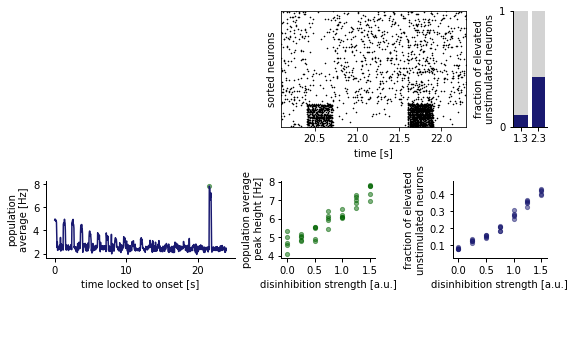

In [11]:
E_disin = E_all[-2][0]
ed_disin = ed_all[-2]

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 12}

matplotlib.rc('font', **font)

SMALL_SIZE = 10
MEDIUM_SIZE = 10
BIGGER_SIZE = 10

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

cutoff = 1
axiswidth=1
def cm2inch(*tupl):
    inch = 2.54
    if isinstance(tupl[0], tuple):
        return tuple(i/inch for i in tupl[0])
    else:
        return tuple(i/inch for i in tupl)
    
figsize_cm = (20,12)
figsize_inch = cm2inch(figsize_cm)
figsize_inch
fig2 = plt.figure(constrained_layout=True, figsize=figsize_inch)
gs = fig2.add_gridspec(12,8, hspace=1.5, wspace = 1)


f2_ax2 = fig2.add_subplot(gs[0:6,4:7])

f2_ax3 = fig2.add_subplot(gs[0:6,7])

f2_ax4 = fig2.add_subplot(gs[6:10,:4])

f2_ax5 = fig2.add_subplot(gs[6:10,4:6])

f2_ax6 = fig2.add_subplot(gs[6:10,6:])
#f2_ax2.set_title('f2 0 1')

for aa, ax in enumerate([f2_ax3,f2_ax4,f2_ax5,f2_ax6]):
    for axis in ['bottom', 'left']:
            ax.spines[axis].set_linewidth(axiswidth)
    for axis in ['top', 'right']:
        ax.spines[axis].set_linewidth(0)
    ax.xaxis.set_tick_params(width=axiswidth)
    ax.yaxis.set_tick_params(width=axiswidth)
    ax.locator_params(tight=True, nbins=5)


color = ["midnightblue","lightskyblue","royalblue","darkred","darksalmon", "saddlebrown","darkgreen","greenyellow","darkolivegreen","darkmagenta","thistle","indigo","darkorange","tan","sienna", "black", "silver","dimgrey", "fuchsia", "orchid","plum",  "lightseagreen", "lightcyan", "darkslategray",  "goldenrod","gold", "wheat","forestgreen", "aquamarine", "palegreen"]

f2_ax4.plot(ed_all[i][:-cutoff], E_all[i][0][:-cutoff], color = 'midnightblue', label='disinhibition')
f2_ax4.scatter(ed[-1],max_fr[-1], marker= '.',s=70, alpha=0.5, color='darkgreen')#scatter(strength_disinhib, max_fr, alpha = 0.5, color='darkred', )
f2_ax4.set(ylabel ="population\naverage [Hz]", xlabel = "time locked to onset [s]")
f2_ax5.scatter(strength_disinhib, max_fr, marker= '.',s=70, alpha = 0.5, color='darkgreen', )
f2_ax5.set(ylabel ="population average\n peak height [Hz]", xlabel = "disinhibition strength [a.u.]")

f2_ax6.scatter(strength_disinhib,fraction_unstim, marker='.',s=70, alpha = 0.5, color='midnightblue')
f2_ax6.set(ylabel ="fraction of elevated\nunstimulated neurons", xlabel = "disinhibition strength [a.u.]")

# ====================================== raster plot disinhibition =========================

rowcount = 149
for cc in range(150,400):
    rowcount+=1    
    vals = spiketimes[cc,:int(np.rint(total_spike_counts[sq,bl,cc]))]/10000
    y = rowcount*np.ones(len(vals))
    f2_ax2.scatter(vals,y,s=10,marker=".",c = 'black',linewidths=0)
f2_ax2.set(xlim=[6.7,7.4],ylim=[150,400])
f2_ax2.set(xlim=[20.1,22.3],ylim=[150,400])
f2_ax2.set(ylabel ="sorted neurons", xlabel="time [s]", yticks=[])

#np.where(range_disin[200:]>range_pre_disin[200:])
comp_disinh = [ x>y for (x,y) in zip(range_disin[200:], range_pre_disin[200:])]
comp_stim = [ x>y for (x,y) in zip(range_stim[200:], range_pre_stim[200:])]
comp_stim_dis = [ x>y for (x,y) in zip(range_disin[200:], range_stim[200:])]


f2_ax3.bar(1.3,len(comp_stim)/len(comp_stim), color='lightgrey')
f2_ax3.bar(1.3,sum(comp_stim)/len(comp_stim), color='midnightblue')

f2_ax3.bar(2.3,len(comp_disinh)/len(comp_stim), color='lightgrey')
f2_ax3.bar(2.3,sum(comp_disinh)/len(comp_stim), color='midnightblue')

f2_ax3.set(ylabel = "fraction of elevated\nunstimulated neurons", yticks=[0,1], ylim=[0,1], xticks=[1.3,2.3])

save_fig("./figures/", "Figure_6_Disinhibition")